![title](img/python-logo-master-flat-200.png)

# Introduction to Python for Data Science

Python's <font color='green'>simple, easy to learn syntax </font> emphasizes readability and therefore reduces the cost of program maintenance. Python supports <font color='green'>modules and packages</font>, which encourages <font color='green'>program modularity and code reuse</font>.

Python is a general-purpose coding language. It supports other types of programming and software development besides web development. That includes back end development, software development, <font color='green'>data science</font> and writing system scripts among other things.

***
Some of the python packages that we shall be using in these webinar include 
1. <font color='blue'>pandas</font> - spreadsheet support; 
2. <font color='blue'>numpy</font> - matrix manipulations;
3. <font color='blue'>scipy</font> - support for mathematics, science, and engineering; 
4. <font color='blue'>matplotlib</font> for data visualisation;  
5. <font color='blue'>scikit-learn</font> for Machine Learning</font>; 
6. and <font color='blue'>datetime</font> manipulating dates and times.
***

## Loading modules 

In [3]:
#import module pandas and rename it pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from module datetime import class datetime and rename it dt ( other classes 
# found in the datetime module include timezone,timedelta, date, time)
from datetime import datetime as dt
from shapely.geometry import Point

In [108]:
# accessing all the classes in a module
import datetime
datetime.__dir__()

['__name__',
 '__doc__',
 '__package__',
 '__loader__',
 '__spec__',
 '__file__',
 '__cached__',
 '__builtins__',
 'sys',
 'MINYEAR',
 'MAXYEAR',
 'timedelta',
 'date',
 'tzinfo',
 'time',
 'datetime',
 'timezone',
 'datetime_CAPI']

***
`[pandas]` is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals". — Wikipedia 

* load data of different data formats including csv, spss, sas, stata, excel, json, and database
* explore data: removing missing values and duplicates; replacing with new values, filtering rows and columns by some criteria
* calculating statistics (avg, min, max, median, percentile per column) and answer questions about correlations between columns two columns
* visualise the data directly (based on matplotlib) plot bars, lines, histogram, bubbles and more
* store the clean, transformed data to csv, or other file types or databases.
***

American Red Cross, Kenya Cell Tower Locations, Feb 14, 2019, https://data.humdata.org/dataset/kenya-cell-tower-locations. Accessed on[2nd May 2020] Licence CC BY Methodology: Direct observation Data/Anecdotal Data

In [3]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1bNQXAYigYVCuKVJtdzCTij_UzqHYIX37',
                                    dest_path='./data/sampleTowers_humdata.csv.zip',
                                    unzip=True)

In [4]:
#read data into a DataFrame called  sampleTowersdf
sampleTowersdf = pd.read_csv('./data/sampleTowers_humdata.csv')
#check the number of rows and columns
sampleTowersdf.shape

(55713, 10)

In [5]:
import geopandas as gp
sampleTowers_gpdf=gp.GeoDataFrame()
sampleTowers_gpdf['geometry']=[Point(sampleTowersdf.iloc[idx].lon, sampleTowersdf.iloc[idx].lat) for idx in sampleTowersdf.index]
sampleTowers_gpdf.columns

Index(['geometry'], dtype='object')

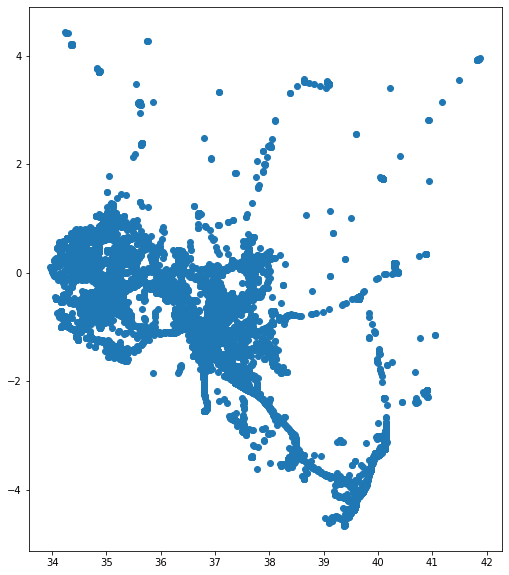

In [6]:
sampleTowers_gpdf.plot(figsize=(10,10))

In [7]:
#copying the other columns in the DataFrame to GeoDataFrame
cols=['lon', 'lat', 'updated', 'net', 'averagesig', 'created',
       'county', 'subcounty', 'ward']

print (sampleTowers_gpdf.columns)

for col in cols:
    sampleTowers_gpdf[col]=sampleTowersdf[col]
    
sampleTowers_gpdf.columns

Index(['geometry'], dtype='object')


Index(['geometry', 'lon', 'lat', 'updated', 'net', 'averagesig', 'created',
       'county', 'subcounty', 'ward'],
      dtype='object')

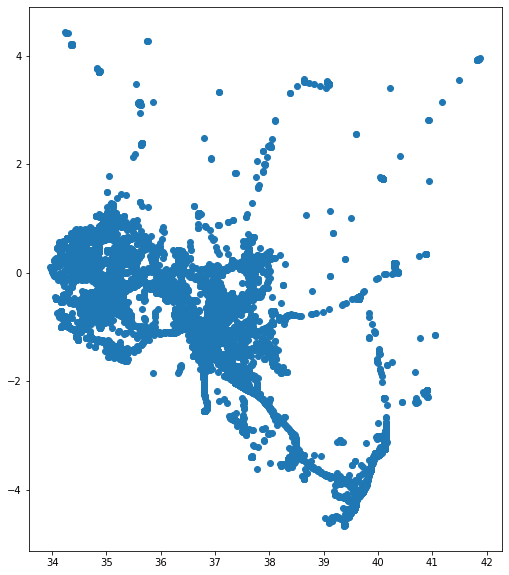

In [8]:
sampleTowers_gpdf.plot(figsize=(10,10))

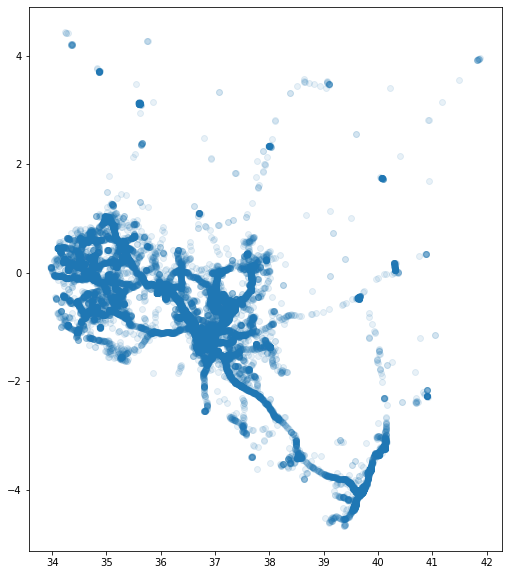

In [9]:
fig,ax=plt.subplots(figsize=(10,10))
sampleTowers_gpdf.plot(ax=ax, alpha=0.1)

In [46]:
#read Kenya admin boundary from google drive and unzip it
gdd.download_file_from_google_drive(file_id='1dqJywAYNAhdbtzE3x7z_q4G3lwJE7bHw',
                                    dest_path='./data/ken_adm_iebc_20191031_shp.zip',
                                    unzip=True)

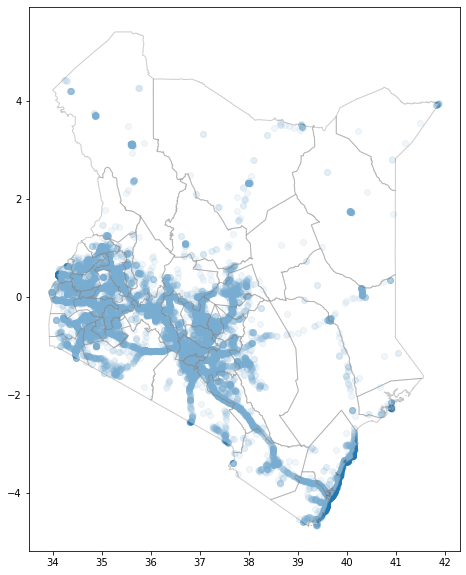

In [10]:
filePathx='./data/ken_admbnda_adm1_iebc_20191031.shp'

admin1_Kenya_gpdf=gp.read_file(filePathx)

fig,ax=plt.subplots(figsize=(10,10))

sampleTowers_gpdf.plot(ax=ax, alpha=0.1)
admin1_Kenya_gpdf.plot(ax=ax, edgecolor='gray',facecolor='white',alpha=0.4)

## Data exploration - Sample cell tower data

In [11]:
sampleTowers_gpdf.columns

Index(['geometry', 'lon', 'lat', 'updated', 'net', 'averagesig', 'created',
       'county', 'subcounty', 'ward'],
      dtype='object')

In [12]:
# shape picks (nrows, ncols)  nrows - number of records/transactions/cases
# and ncols - number of fields/features/variables 
sampleTowers_gpdf.shape

(55713, 10)

In [50]:
# print('%d rows and %d columns' %(data.shape[0],data.shape[1]))
print ("{:,d}".format(sampleTowers_gpdf.shape[0])+' rows and %d columns' %(sampleTowers_gpdf.shape[1]))

55,713 rows and 10 columns


In [13]:
# display top 5 records
sampleTowers_gpdf.head()

,geometry,lon,lat,updated,net,averagesig,created,county,subcounty,ward
0,POINT (34.78157 -0.07576),34.781570,-0.075760,2017-02-17,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Migosi Ward
1,POINT (36.85570 -1.21880),36.855698,-1.218796,2016-07-31,2,0,2016-04-03,Nairobi,Roysambu Sub County,Roysambu Ward
2,POINT (34.77516 -0.08638),34.775162,-0.086380,2016-11-24,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Kondele Ward
3,POINT (34.77928 -0.07896),34.779282,-0.078964,2016-04-03,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Migosi Ward
4,POINT (36.11275 -0.26711),36.112747,-0.267105,2012-08-16,2,0,2012-08-10,Nakuru,Nakuru North Sub County,Kiamaina Ward


In [14]:
sampleTowers_gpdf.tail()

,geometry,lon,lat,updated,net,averagesig,created,county,subcounty,ward
55708,POINT (36.88226 -1.32749),36.882259,-1.327488,2019-01-02,2,0,2019-01-02,Nairobi,Embakasi South Sub County,Imara Daima Ward
55709,POINT (34.08747 0.22777),34.087470,0.227772,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55710,POINT (34.08742 0.22786),34.087422,0.227864,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55711,POINT (34.08756 0.22769),34.087563,0.227694,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55712,POINT (34.08743 0.22775),34.087429,0.227753,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward


In [15]:
sampleTowers_gpdf.tail(10)

,geometry,lon,lat,updated,net,averagesig,created,county,subcounty,ward
55703,POINT (36.82597 -1.28354),36.825966,-1.283539,2018-12-22,2,0,2018-12-22,Nairobi,Starehe Sub County,Nairobi Central Ward
55704,POINT (36.77245 -1.33897),36.772449,-1.338970,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,Mugumo-ini Ward
55705,POINT (36.82820 -1.30883),36.828205,-1.308829,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,Nairobi West Ward
55706,POINT (36.83495 -1.31771),36.834953,-1.317715,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,South C Ward
55707,POINT (36.95085 -1.28845),36.950855,-1.288454,2018-12-29,2,0,2018-12-29,Nairobi,Embakasi East Sub County,Mihango Ward
55708,POINT (36.88226 -1.32749),36.882259,-1.327488,2019-01-02,2,0,2019-01-02,Nairobi,Embakasi South Sub County,Imara Daima Ward
55709,POINT (34.08747 0.22777),34.087470,0.227772,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55710,POINT (34.08742 0.22786),34.087422,0.227864,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55711,POINT (34.08756 0.22769),34.087563,0.227694,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward
55712,POINT (34.08743 0.22775),34.087429,0.227753,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward


## Selecting subsets and filtering of the data

In [16]:
sampleTowers_gpdf.columns

Index(['geometry', 'lon', 'lat', 'updated', 'net', 'averagesig', 'created',
       'county', 'subcounty', 'ward'],
      dtype='object')

In [17]:
# selecting the on column (say county) with duplicates
sampleTowers_gpdf['county'].head(4)

0     Kisumu
1    Nairobi
2     Kisumu
3     Kisumu
Name: county, dtype: object

In [18]:
print("{:,d}".format(sampleTowers_gpdf['county'].shape[0]))

55,713


In [19]:
#unique counties
pd.unique(sampleTowers_gpdf['county'])

array(['Kisumu', 'Nairobi', 'Nakuru', 'Machakos', 'MAKUENI', 'KAJIADO',
       'Kilifi', 'Mombasa', 'Kwale', 'TAITA TAVETA', 'Kiambu', 'KERICHO',
       'KIRINYAGA', 'EMBU', 'NYANDARUA', 'LAIKIPIA', 'NYERI', 'Muranga',
       'Uasin Gishu', 'Kisii', 'GARISSA', 'ISIOLO', 'NANDI', 'BARINGO',
       'Siaya', 'Kakamega', 'Homa Bay', 'ELGEYO-MARAKWET', 'LAMU', 'MERU',
       'TURKANA', 'MANDERA', 'Busia', 'KITUI', 'WEST POKOT', 'SAMBURU',
       'Narok', 'TRANS NZOIA', 'Nyamira', 'Migori', 'TANA RIVER', 'Bomet',
       'WAJIR', 'THARAKA-NITHI', 'Bungoma', 'Vihiga', 'MARSABIT'],
      dtype=object)

In [20]:
#unique counties
sampleTowers_gpdf['county'].drop_duplicates().shape[0]

47

In [21]:
#selecting three columns (say county, sub county) notice we are using [[ ]] instead of []
selectiondf1 = sampleTowers_gpdf[['county','subcounty']]

print(type(selectiondf1))
print(selectiondf1.shape)

<class 'pandas.core.frame.DataFrame'>
(55713, 2)


In [22]:
#unique pairs of county and subcounty
#selecting three columns (say county, sub county) notice we are using [[ ]] instead of []
selectiondf2 = sampleTowers_gpdf[['county','subcounty']].drop_duplicates(subset=['county','subcounty'])
print(selectiondf2.shape)
selectiondf2

(294, 2)


,county,subcounty
0,Kisumu,Kisumu Central Sub County
1,Nairobi,Roysambu Sub County
4,Nakuru,Nakuru North Sub County
7,Nakuru,Nakuru West Sub County
11,Nairobi,Langata Sub County
...,...,...
44966,WAJIR,Tarbaj Sub County
45540,ELGEYO-MARAKWET,Marakwet East sub-county
49299,WAJIR,Wajir North Sub County
54708,WAJIR,Wajir South Sub County


*** 
Exercise 2: select distinct combinations of county, subcounty, ward 
***

In [24]:
#unique pairs of county and subcounty
#selecting three columns (say county, sub county) notice we are using [[ ]] instead of []
sampleTowers_gpdf[['county','subcounty']].drop_duplicates(subset=['county','subcounty']).sort_values(by=['county', 'subcounty'])

,county,subcounty
1405,BARINGO,Baringo Central Sub County
2436,BARINGO,Baringo North Sub County
1170,BARINGO,Koibatek Sub County
1199,BARINGO,Marigat Sub County
2320,BARINGO,Mogotio Sub County
...,...,...
54708,WAJIR,Wajir South Sub County
55592,WEST POKOT,Pokot Central Sub County
37524,WEST POKOT,Pokot North Sub County
2132,WEST POKOT,Pokot South Sub County


*** 
Exercise 3: select distinct combinations of county, subcounty, ward sorted by county and then subcounty
***

In [26]:
#selecting all columns and records for Nairobi county
Nairobi_gpdf=sampleTowers_gpdf[sampleTowers_gpdf['county']=='Nairobi']
print(Nairobi_gpdf.shape)
Nairobi_gpdf

(21638, 10)


,geometry,lon,lat,updated,net,averagesig,created,county,subcounty,ward
1,POINT (36.85570 -1.21880),36.855698,-1.218796,2016-07-31,2,0,2016-04-03,Nairobi,Roysambu Sub County,Roysambu Ward
11,POINT (36.92842 -1.40212),36.928415,-1.402118,2013-08-17,2,0,2012-12-03,Nairobi,Langata Sub County,Mugumo-ini Ward
12,POINT (36.89140 -1.31905),36.891403,-1.319046,2012-12-04,2,0,2012-12-04,Nairobi,Embakasi South Sub County,Kware Ward
13,POINT (36.89415 -1.32454),36.894150,-1.324539,2012-12-04,2,0,2012-12-04,Nairobi,Embakasi South Sub County,Pipeline Ward
14,POINT (36.89140 -1.32729),36.891403,-1.327286,2012-12-04,2,0,2012-12-04,Nairobi,Embakasi South Sub County,Kwa Njenga Ward
...,...,...,...,...,...,...,...,...,...,...
55704,POINT (36.77245 -1.33897),36.772449,-1.338970,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,Mugumo-ini Ward
55705,POINT (36.82820 -1.30883),36.828205,-1.308829,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,Nairobi West Ward
55706,POINT (36.83495 -1.31771),36.834953,-1.317715,2018-12-24,2,0,2018-12-24,Nairobi,Langata Sub County,South C Ward
55707,POINT (36.95085 -1.28845),36.950855,-1.288454,2018-12-29,2,0,2018-12-29,Nairobi,Embakasi East Sub County,Mihango Ward


In [81]:
Nairobi_gpdf.shape

(21638, 10)

In [88]:
#selecting all columns from Nariobi and Nakaru county
county2NN_gpdf = sampleTowers_gpdf[(sampleTowers_gpdf['county']=='Nairobi') | (sampleTowers_gpdf['county']=='Nakuru')]
print(county2NN_gpdf.shape)

(24860, 10)


Exercise 3: how many towers are in Nakuru

## lambda functions

In [27]:
strdate = sampleTowers_gpdf['created'][0]
print(strdate)

2016-04-03


In [28]:
strdate[0:7]

'2016-04'

In [30]:
#lambda function to exrtract month and year strings -takes datetime string x and returns characters 
# from the 3rd to 10th 
extractMonthYear = lambda x : x[0:7]
extractMonthYear(strdate)

'2016-04'

In [31]:
sampleTowers_gpdf['CreatedYearMonth']=sampleTowers_gpdf['created'].apply(extractMonthYear)
sampleTowers_gpdf

,geometry,lon,lat,updated,net,averagesig,created,county,subcounty,ward,CreatedYearMonth
0,POINT (34.78157 -0.07576),34.781570,-0.075760,2017-02-17,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Migosi Ward,2016-04
1,POINT (36.85570 -1.21880),36.855698,-1.218796,2016-07-31,2,0,2016-04-03,Nairobi,Roysambu Sub County,Roysambu Ward,2016-04
2,POINT (34.77516 -0.08638),34.775162,-0.086380,2016-11-24,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Kondele Ward,2016-04
3,POINT (34.77928 -0.07896),34.779282,-0.078964,2016-04-03,2,0,2016-04-03,Kisumu,Kisumu Central Sub County,Migosi Ward,2016-04
4,POINT (36.11275 -0.26711),36.112747,-0.267105,2012-08-16,2,0,2012-08-10,Nakuru,Nakuru North Sub County,Kiamaina Ward,2012-08
...,...,...,...,...,...,...,...,...,...,...,...
55708,POINT (36.88226 -1.32749),36.882259,-1.327488,2019-01-02,2,0,2019-01-02,Nairobi,Embakasi South Sub County,Imara Daima Ward,2019-01
55709,POINT (34.08747 0.22777),34.087470,0.227772,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward,2019-01
55710,POINT (34.08742 0.22786),34.087422,0.227864,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward,2019-01
55711,POINT (34.08756 0.22769),34.087563,0.227694,2019-01-06,2,0,2019-01-06,Busia,Samia Sub County,Ageng'a Nanguba Ward,2019-01


In [32]:
sampleTowers_gpdf.pivot_table(index=['county','subcounty','CreatedYearMonth'], values='updated',aggfunc=len).reset_index()

,county,CreatedYearMonth,subcounty,updated
0,BARINGO,2011-06,Koibatek Sub County,1
1,BARINGO,2011-12,Marigat Sub County,1
2,BARINGO,2013-03,Baringo Central Sub County,2
3,BARINGO,2013-06,Marigat Sub County,1
4,BARINGO,2013-07,Mogotio Sub County,1
...,...,...,...,...
4041,WEST POKOT,2016-11,Pokot North Sub County,2
4042,WEST POKOT,2017-01,West Pokot Sub County,1
4043,WEST POKOT,2017-03,West Pokot Sub County,1
4044,WEST POKOT,2017-09,West Pokot Sub County,4


In [34]:
sampleTowers_gpdf.pivot_table(index=['county'], values='updated',aggfunc=len)

,updated
county,
BARINGO,228
Bomet,345
Bungoma,507
Busia,302
ELGEYO-MARAKWET,128
EMBU,305
GARISSA,239
Homa Bay,458
ISIOLO,97


# SQL

In [4]:
# reading csv file format
# We read more data formats like Excel, JSON, Text,... 
file_ = './gsm_generated_cdrs20200619.csv'
cdr_df = pd.read_csv(file_)
#display the columns -
cdr_df.columns

Index(['record_id', 'caller_msisdn', 'call_type', 'caller_customerid',
       'caller_operator_name', 'caller_cell_id', 'call_duration',
       'total_bytes', 'charge_amount', 'main_balance_after', 'call_start_time',
       'called_msisdn', 'called_customerid', 'called_operator_name',
       'called_cell_id'],
      dtype='object')

In [5]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///fake_cdr_data.db', echo=True)
sqlite_connection = engine.connect()

2020-08-19 15:49:25,621 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-08-19 15:49:25,622 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:49:25,623 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-08-19 15:49:25,624 INFO sqlalchemy.engine.base.Engine ()


In [9]:
sqlite_table = "fake_cdr"
cdr_df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-08-19 15:51:12,759 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("fake_cdr")
2020-08-19 15:51:12,760 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:51:12,761 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("fake_cdr")
2020-08-19 15:51:12,762 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:51:12,763 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2020-08-19 15:51:12,764 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:51:12,765 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_xinfo("fake_cdr")
2020-08-19 15:51:12,765 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:51:12,768 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'fake_cdr' AND type = 'table'
2020-08-19 15:51:12,769 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 15:51:12,770 INFO sqlalchemy.engine.base.Engine PRAGMA main.foreign_key_list("f

OperationalError: (sqlite3.OperationalError) database is locked
[SQL: 
DROP TABLE fake_cdr]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

***
SELECT * FROM t;<br>
Query all rows and columns from a table
***

In [10]:
all_cdr_df = pd.read_sql_query("select * from fake_cdr",con=sqlite_connection)

2020-08-19 15:51:55,541 INFO sqlalchemy.engine.base.Engine select * from fake_cdr
2020-08-19 15:51:55,542 INFO sqlalchemy.engine.base.Engine ()


In [115]:
all_cdr_df.shape

(5094044, 16)

In [11]:
all_cdr_df.columns

Index(['index', 'record_id', 'caller_msisdn', 'call_type', 'caller_customerid',
       'caller_operator_name', 'caller_cell_id', 'call_duration',
       'total_bytes', 'charge_amount', 'main_balance_after', 'call_start_time',
       'called_msisdn', 'called_customerid', 'called_operator_name',
       'called_cell_id'],
      dtype='object')

***
SELECT c1, c2 FROM t; <br>
Query data in columns c1, c2 from a table
***

In [13]:
selectcdr1_df = pd.read_sql_query("select caller_msisdn, call_type,caller_cell_id from fake_cdr",con=sqlite_connection)
print(selectcdr1_df.shape)
selectcdr1_df.head()

2020-08-19 15:54:55,354 INFO sqlalchemy.engine.base.Engine select caller_msisdn, call_type,caller_cell_id from fake_cdr
2020-08-19 15:54:55,355 INFO sqlalchemy.engine.base.Engine ()
(5094044, 3)


,caller_msisdn,call_type,caller_cell_id
0,254724459161,sms,1058602
1,254724459161,sms,1058602
2,254724459161,voice,1058602
3,254724459161,sms,1010895
4,254724459161,voice,1058602


***
SELECT c1, c2 FROM t WHERE condition;<br>
Query data and filter rows with a condition
***

In [14]:
selectcdr2_df = pd.read_sql_query("select caller_msisdn, call_type,caller_cell_id from fake_cdr where call_type='voice'",con=sqlite_connection)
print(selectcdr2_df.shape)
selectcdr2_df.head()

2020-08-19 15:56:25,311 INFO sqlalchemy.engine.base.Engine select caller_msisdn, call_type,caller_cell_id from fake_cdr where call_type='voice'
2020-08-19 15:56:25,312 INFO sqlalchemy.engine.base.Engine ()
(1697052, 3)


,caller_msisdn,call_type,caller_cell_id
0,254724459161,voice,1058602
1,254724459161,voice,1058602
2,254724459161,voice,1010895
3,254724459161,voice,1010895
4,254724459161,voice,1058602


***
SELECT DISTINCT c1 FROM t WHERE condition; <br>
Query distinct rows from a table
***

In [25]:
selectcdr3_df = pd.read_sql_query("select DISTINCT(caller_msisdn), call_type from fake_cdr where call_type='voice'",con=sqlite_connection)
print(selectcdr3_df.shape)
selectcdr3_df.head()

2020-08-19 16:16:34,569 INFO sqlalchemy.engine.base.Engine select DISTINCT(caller_msisdn), call_type from fake_cdr where call_type='voice'
2020-08-19 16:16:34,571 INFO sqlalchemy.engine.base.Engine ()
(97337, 2)


,caller_msisdn,call_type
0,254724459161,voice
1,254721851907,voice
2,254723166429,voice
3,254726715241,voice
4,254721457176,voice


***
SELECT c1, c2 FROM t ORDER BY c1 ASC [DESC];<br>
Sort the result set in ascending or descending order
***

In [28]:
selectcdr3_df = pd.read_sql_query("select caller_msisdn, caller_cell_id from fake_cdr order by caller_cell_id desc",con=sqlite_connection)
print(selectcdr3_df.shape)
selectcdr3_df.head()

2020-08-19 16:22:14,544 INFO sqlalchemy.engine.base.Engine select caller_msisdn, caller_cell_id from fake_cdr order by caller_cell_id desc
2020-08-19 16:22:14,545 INFO sqlalchemy.engine.base.Engine ()
(5094044, 2)


,caller_msisdn,caller_cell_id
0,254724039718,1078723
1,254724039718,1078723
2,254724039718,1078723
3,254724039718,1078723
4,254724039718,1078723


***
SELECT c1, <font color='green'>aggregate</font>(*) FROM t GROUP BY c1; <br>
Group rows using an aggregate function

where <font color='green'>aggregate</font> is a aggregate function e.g. count, max, min, average
***

In [22]:
# view sub totals of call_type
selectcdr3_df = pd.read_sql_query("select call_type, count(*) as subtotal from fake_cdr group by call_type",con=sqlite_connection)
print(selectcdr3_df.shape)
selectcdr3_df.head()


2020-08-19 16:07:18,045 INFO sqlalchemy.engine.base.Engine select call_type, count(*) as subtotal from fake_cdr group by call_type
2020-08-19 16:07:18,046 INFO sqlalchemy.engine.base.Engine ()
(3, 2)


,call_type,subtotal
0,data,1699550
1,sms,1697442
2,voice,1697052


In [18]:
selectcdr3_df['subtotal'].sum()

5094044

In [ ]:
sql1="""select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls \
from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id"""

df1 = pd.read_sql_query(sqlB,con=sqlite_connection)
df1

In [112]:
sql1="""select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls \
from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id"""

df1 = pd.read_sql_query(sqlB,con=sqlite_connection)
df1

2020-08-19 14:59:26,837 INFO sqlalchemy.engine.base.Engine  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id
2020-08-19 14:59:26,839 INFO sqlalchemy.engine.base.Engine ()


,caller,cell_id,total_calls
0,254721000008,1038208.0,6
1,254721000008,1048498.0,27
2,254721000192,1018481.0,15
3,254721000192,1062371.0,9
4,254721000250,1056264.0,29
...,...,...,...
197742,254729999815,1077727.0,9
197743,254729999898,1020446.0,11
197744,254729999898,1044460.0,15
197745,254729999914,1035206.0,12


In [107]:
sql= """INSERT INTO cell_ranking(msisdn, cell_id, total_calls, cell_rank) select caller as msisdn, 
        cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from(
    select caller, cell_id, sum(total_calls) as total_calls
    from (
        select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls 
        from fake_cdr as GSM_CDRS where caller_cell_id!=''group by caller_msisdn, caller_cell_id
        union all
        select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls 
        from giz_kenya.GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id
        ) a
        group by caller, cell_id
        order by caller, cell_id desc
) b
"""

sql

"INSERT INTO cell_ranking(msisdn, cell_id, total_calls, cell_rank)\nselect caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank\nfrom(\n    select caller, cell_id, sum(total_calls) as total_calls\n    from (\n        select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls \n        from fake_cdr as GSM_CDRS where caller_cell_id!=''group by caller_msisdn, caller_cell_id\n        union all\n        select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls \n        from giz_kenya.GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id\n        ) a\n        group by caller, cell_id\n        order by caller, cell_id desc\n) b\n"

In [80]:
sqlA= """ select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls """ \
     """from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id"""

# print (sql)
dfA = pd.read_sql_query(sqlB,con=sqlite_connection)

2020-08-19 12:37:43,135 INFO sqlalchemy.engine.base.Engine  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id
2020-08-19 12:37:43,136 INFO sqlalchemy.engine.base.Engine ()


In [82]:
dfA

,caller,cell_id,total_calls
0,254721000008,1038208.0,6
1,254721000008,1048498.0,27
2,254721000192,1018481.0,15
3,254721000192,1062371.0,9
4,254721000250,1056264.0,29
...,...,...,...
197742,254729999815,1077727.0,9
197743,254729999898,1020446.0,11
197744,254729999898,1044460.0,15
197745,254729999914,1035206.0,12


In [81]:
sqlB =""" select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls """ \
    """from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id"""
dfB = pd.read_sql_query(sqlB,con=sqlite_connection)

2020-08-19 12:37:55,925 INFO sqlalchemy.engine.base.Engine  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id
2020-08-19 12:37:55,926 INFO sqlalchemy.engine.base.Engine ()


In [83]:
dfB

,caller,cell_id,total_calls
0,254721000008,1038208.0,6
1,254721000008,1048498.0,27
2,254721000192,1018481.0,15
3,254721000192,1062371.0,9
4,254721000250,1056264.0,29
...,...,...,...
197742,254729999815,1077727.0,9
197743,254729999898,1020446.0,11
197744,254729999898,1044460.0,15
197745,254729999914,1035206.0,12


In [84]:
sqlAB=sqlA+""" union all """+sqlB
sqlAB
dfAB=pd.read_sql_query(sqlAB,con=sqlite_connection)

2020-08-19 12:38:35,332 INFO sqlalchemy.engine.base.Engine  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id
2020-08-19 12:38:35,334 INFO sqlalchemy.engine.base.Engine ()


In [85]:
dfAB

,caller,cell_id,total_calls
0,254721000008,1038208.0,4
1,254721000008,1048498.0,17
2,254721000192,1018481.0,26
3,254721000192,1062371.0,8
4,254721000250,1056264.0,7
...,...,...,...
392636,254729999815,1077727.0,9
392637,254729999898,1020446.0,11
392638,254729999898,1044460.0,15
392639,254729999914,1035206.0,12


In [88]:
sqlC = """select caller, cell_id, sum(total_calls) as total_calls from ( """+sqlAB+ """ ) a group by caller, cell_id order by caller, cell_id desc"""
# print (sqlC)
dfC = pd.read_sql_query(sqlC,con=sqlite_connection)

2020-08-19 12:42:19,540 INFO sqlalchemy.engine.base.Engine select caller, cell_id, sum(total_calls) as total_calls from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller, cell_id desc
2020-08-19 12:42:19,541 INFO sqlalchemy.engine.base.Engine ()


In [89]:
dfC

,caller,cell_id,total_calls
0,254721000008,1048498.0,44
1,254721000008,1038208.0,10
2,254721000192,1062371.0,17
3,254721000192,1018481.0,41
4,254721000250,1065050.0,20
...,...,...,...
197749,254729999815,1005134.0,49
197750,254729999898,1044460.0,67
197751,254729999898,1020446.0,39
197752,254729999914,1063833.0,57


In [100]:
sqlRanking="""select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) """\
    """as cell_rank from ("""+ sqlC +""") b """ 
sqlRanking


"select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from (select caller, cell_id, sum(total_calls) as total_calls from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller, cell_id desc) b "

" select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller,  cell_id desc) b;"

In [101]:
dfRanking = pd.read_sql_query(sqlRanking,con=sqlite_connection)

2020-08-19 13:06:56,215 INFO sqlalchemy.engine.base.Engine select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from (select caller, cell_id, sum(total_calls) as total_calls from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller, cell_id desc) b 
2020-08-19 13:06:56,216 INFO sqlalchemy.engine.base.Engine ()


In [102]:
dfRanking

,msisdn,cell_id,total_calls,cell_rank
0,254721000008,1048498.0,44,1
1,254721000008,1038208.0,10,2
2,254721000192,1018481.0,41,1
3,254721000192,1062371.0,17,2
4,254721000250,1056264.0,36,1
...,...,...,...,...
197749,254729999815,1077727.0,21,2
197750,254729999898,1044460.0,67,1
197751,254729999898,1020446.0,39,2
197752,254729999914,1063833.0,57,1


In [103]:
pd.unique(dfRanking['msisdn']).shape[0]*2

198932

In [106]:
# sqlInsert="""INSERT INTO cell_ranking(msisdn, cell_id, total_calls, cell_rank) """+ sqlRanking
sqlite_table = "cell_ranking"
dfRanking.to_sql(sqlite_table, sqlite_connection, if_exists='fail')

2020-08-19 13:13:14,166 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("cell_ranking")
2020-08-19 13:13:14,167 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 13:13:14,167 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("cell_ranking")
2020-08-19 13:13:14,168 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 13:13:14,171 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE cell_ranking (
	"index" BIGINT, 
	msisdn BIGINT, 
	cell_id FLOAT, 
	total_calls BIGINT, 
	cell_rank BIGINT
)


2020-08-19 13:13:14,171 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 13:13:14,173 INFO sqlalchemy.engine.base.Engine COMMIT
2020-08-19 13:13:14,175 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_cell_ranking_index ON cell_ranking ("index")
2020-08-19 13:13:14,175 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 13:13:14,178 INFO sqlalchemy.engine.base.Engine COMMIT
2020-08-19 13:13:14,202 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2020-08-19 13:13:15,212 INFO sqlalchemy.engi

In [105]:
sqlInsert
pd.read_sql_query(sqlInsert,con=sqlite_connection)

2020-08-19 13:10:33,473 INFO sqlalchemy.engine.base.Engine INSERT INTO cell_ranking(msisdn, cell_id, total_calls, cell_rank) select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from (select caller, cell_id, sum(total_calls) as total_calls from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller, cell_id desc) b 
2020-08-19 13:10:33,474 INFO sqlalchemy.engine.base.Engine ()
2020-08-19 13:10:33,476 INFO sqlalchemy.engine.base.Engine ROLLBACK


OperationalError: (sqlite3.OperationalError) no such table: cell_ranking
[SQL: INSERT INTO cell_ranking(msisdn, cell_id, total_calls, cell_rank) select caller as msisdn, cell_id, total_calls , ROW_NUMBER() OVER (PARTITION BY caller ORDER BY total_calls desc) as cell_rank from (select caller, cell_id, sum(total_calls) as total_calls from (  select caller_msisdn as caller, caller_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where caller_cell_id!='' group by caller_msisdn, caller_cell_id union all  select called_msisdn as caller, called_cell_id as cell_id, count(*) as total_calls from fake_cdr as GSM_CDRS where called_cell_id!='' group by called_msisdn, called_cell_id ) a group by caller, cell_id order by caller, cell_id desc) b ]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [4]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [5]:
pysqldf("SELECT * FROM cdr_df LIMIT 10;")

,record_id,caller_msisdn,call_type,caller_customerid,caller_operator_name,caller_cell_id,call_duration,total_bytes,charge_amount,main_balance_after,call_start_time,called_msisdn,called_customerid,called_operator_name,called_cell_id
0,909837048,254724459161,sms,9781767394571,Wright-Gordon,1058602,0,0,7141,5429,31-01-2020 07:40:42 PM,254725916829,9780167814771,Wright-Gordon,1039235.0
1,936701345,254724459161,sms,9781767394571,Wright-Gordon,1058602,0,0,15140,10369,19-01-2020 05:39:09 AM,254725916829,9780167814771,Wright-Gordon,1039235.0
2,972852802,254724459161,voice,9781767394571,Wright-Gordon,1058602,6009,0,5456,12391,18-01-2020 01:14:49 PM,254728781331,9781800521438,Carroll Ltd,1076043.0
3,975830240,254724459161,sms,9781767394571,Wright-Gordon,1010895,0,0,3504,19895,02-01-2020 09:49:10 AM,254728777146,9781890261399,Carroll Ltd,1052058.0
4,904988841,254724459161,voice,9781767394571,Wright-Gordon,1058602,2953,0,10175,9111,14-01-2020 02:23:43 AM,254728777146,9781890261399,Carroll Ltd,1041924.0
5,940908552,254724459161,voice,9781767394571,Wright-Gordon,1010895,2336,0,19306,11889,30-01-2020 04:17:32 PM,254728777146,9781890261399,Carroll Ltd,1052058.0
6,911743303,254724459161,data,9781767394571,Wright-Gordon,1058602,0,691692,13187,9035,31-01-2020 06:14:59 PM,254729465999,9781102402404,Carroll Ltd,NaN
7,991989197,254724459161,sms,9781767394571,Wright-Gordon,1058602,0,0,8966,8037,09-01-2020 03:11:30 AM,254729465999,9781102402404,Carroll Ltd,1052034.0
8,981994613,254724459161,data,9781767394571,Wright-Gordon,1058602,0,365703,5800,10798,22-01-2020 06:20:15 AM,254729465999,9781102402404,Carroll Ltd,NaN
9,900907516,254724459161,data,9781767394571,Wright-Gordon,1058602,0,1291344,18978,8139,08-01-2020 11:25:17 PM,254729465999,9781102402404,Carroll Ltd,NaN


In [35]:
g = sampleTowers_gpdf.groupby('CreatedYearMonth')
g

In [36]:
g.groups['2009-04']

Int64Index([ 621,  622,  623,  624,  625,  626,  627,  628,  629,  630,
            ...
            1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089],
           dtype='int64', length=469)

In [150]:
#selecting all columns and records in which 254728542912 is sender and amount less than 400000 
momo_df[(momo_df['sender']==254728542912) & (momo_df['amount']<500000 )]

,record_id,sender,receiver,transaction_type,transaction_time,amount,fee,balance_after,sender_cell_id,receiver_cell_id
1122399,974943932,254728542912,254724631987,W2B,03-01-2020 10:22:33 PM,403759,315.0,20220,1041755,1041755
1122403,902847972,254728542912,254722133317,B2W,01-01-2020 01:00:00 PM,416714,872.0,308,1041755,1041755
1122404,974974967,254728542912,254722174595,BILL_PAYMENT,09-01-2020 11:38:30 AM,370887,621.0,20134,1041755,1041755
1122405,972886797,254728542912,254721718878,P2P,31-01-2020 06:57:29 PM,412576,995.0,14871,1041755,1041755
1122406,963987538,254728542912,254728684063,BILL_PAYMENT,05-01-2020 05:20:22 PM,67678,560.0,14949,1041755,1041755


# Pandas Part - II

In [173]:
momo_df['amount'].mean()

500252.6171705786

In [128]:
momo_df['amount'].describe()

count    1.243802e+06
mean     5.002526e+05
std      2.884398e+05
min      1.000000e+03
25%      2.503762e+05
50%      4.998760e+05
75%      7.500080e+05
max      1.000000e+06
Name: amount, dtype: float64

In [129]:
momo_df['amount'].describe().apply(lambda x: format(x, 'f'))

count    1243802.000000
mean      500252.617171
std       288439.791839
min         1000.000000
25%       250376.250000
50%       499876.000000
75%       750008.000000
max      1000000.000000
Name: amount, dtype: object

## Using apply function

In [153]:
list(momo_df.transaction_time)[0]

'05-01-2020 07:39:08 PM'

In [154]:
type(list(momo_df.transaction_time)[0])

str

In [156]:
strTimeStamp = list(momo_df.transaction_time)[0]
strTimeStamp[0:10]

'05-01-2020'

In [159]:
#define a lambda function to extract string Date from a string timestamp
extractDate = lambda x: x[:10]

In [160]:
extractDate(strTimeStamp)

'05-01-2020'

In [161]:
momo_df['transaction_time'].apply(extractDate)

0          05-01-2020
1          30-01-2020
2          26-01-2020
3          24-01-2020
4          25-01-2020
              ...    
1243797    19-01-2020
1243798    14-01-2020
1243799    22-01-2020
1243800    26-01-2020
1243801    11-01-2020
Name: transaction_time, Length: 1243802, dtype: object

In [165]:
## adding date as a new column to out momo_df
momo_df['datex']=momo_df['transaction_time'].apply(extractDate)
momo_df.columns

Index(['record_id', 'sender', 'receiver', 'transaction_type',
       'transaction_time', 'amount', 'fee', 'balance_after', 'sender_cell_id',
       'receiver_cell_id', 'datex'],
      dtype='object')

In [166]:
momo_df.head()

,record_id,sender,receiver,transaction_type,transaction_time,amount,fee,balance_after,sender_cell_id,receiver_cell_id,datex
0,981870208,254724459161,254725916829,CASHOUT,05-01-2020 07:39:08 PM,733290,630.0,1877,1058602,1058602,05-01-2020
1,915950401,254724459161,254728781331,BILL_PAYMENT,30-01-2020 11:06:54 AM,853410,674.0,8933,1058602,1058602,30-01-2020
2,983880675,254724459161,254729465999,BILL_PAYMENT,26-01-2020 10:50:22 AM,61493,214.0,14237,1058602,1058602,26-01-2020
3,990849704,254724459161,254729024058,BILL_PAYMENT,24-01-2020 05:09:26 PM,73908,736.0,8959,1058602,1058602,24-01-2020
4,956926057,254724459161,254721844002,P2P,25-01-2020 05:03:39 PM,921646,154.0,15890,1058602,1058602,25-01-2020


In [198]:
#Extracting month and year
strTimeStamp = list(momo_df.transaction_time)[0]
strTimeStamp[3:10]

'01-2020'

In [200]:
#lambda function to exrtract month and year strings -takes datetime string x and returns characters 
# from the 3rd to 10th 
extractMonthYear = lambda x : x[3:10]

In [201]:
extractMonthYear(strTimeStamp)

'01-2020'

In [203]:
#apply it to the whole dataframe added a column MonthYear
momo_df['MonthYear']=momo_df['transaction_time'].apply(extractMonthYear)
momo_df

,record_id,sender,receiver,transaction_type,transaction_time,amount,fee,balance_after,sender_cell_id,receiver_cell_id,datex,MonthYear
0,981870208,254724459161,254725916829,CASHOUT,05-01-2020 07:39:08 PM,733290,630.0,1877,1058602,1058602,05-01-2020,01-2020
1,915950401,254724459161,254728781331,BILL_PAYMENT,30-01-2020 11:06:54 AM,853410,674.0,8933,1058602,1058602,30-01-2020,01-2020
2,983880675,254724459161,254729465999,BILL_PAYMENT,26-01-2020 10:50:22 AM,61493,214.0,14237,1058602,1058602,26-01-2020,01-2020
3,990849704,254724459161,254729024058,BILL_PAYMENT,24-01-2020 05:09:26 PM,73908,736.0,8959,1058602,1058602,24-01-2020,01-2020
4,956926057,254724459161,254721844002,P2P,25-01-2020 05:03:39 PM,921646,154.0,15890,1058602,1058602,25-01-2020,01-2020
...,...,...,...,...,...,...,...,...,...,...,...,...
1243797,906953771,254721716916,254727471171,P2P,19-01-2020 12:15:15 AM,635272,750.0,5370,1028775,1028775,19-01-2020,01-2020
1243798,964864419,254725822081,254723941674,P2P,14-01-2020 07:16:57 PM,543022,121.0,13075,1059488,1059488,14-01-2020,01-2020
1243799,947763808,254725822081,254722299421,CASHIN,22-01-2020 01:21:09 AM,87313,0.0,2805,1059488,1059488,22-01-2020,01-2020
1243800,937764589,254725822081,254723803556,W2B,26-01-2020 04:29:57 PM,996429,661.0,10394,1059488,1059488,26-01-2020,01-2020
